In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
from analysis_helper import combine_data

In [2]:
supermarket_data = combine_data("./data/")

In [3]:
supermarket_data.head()

,customer_no,location,unique_id
timestamp,,,
2019-09-03 07:02:00,1,fruit,1.1
2019-09-03 07:02:00,2,drinks,2.1
2019-09-03 07:03:00,1,fruit,1.1
2019-09-03 07:03:00,2,drinks,2.1
2019-09-03 07:03:00,3,dairy,3.1


## Total no. of customers in each section

In [4]:
supermarket_data.groupby(['location'])[['unique_id']].count()

,unique_id
location,
checkout,7445
dairy,17795
drinks,9727
fruit,12718
spices,6283


## Customers at checkout over time

In [5]:
supermarket_data['time'] = supermarket_data.index.time

In [6]:
supermarket_data.head()

,customer_no,location,unique_id,time
timestamp,,,,
2019-09-03 07:02:00,1,fruit,1.1,07:02:00
2019-09-03 07:02:00,2,drinks,2.1,07:02:00
2019-09-03 07:03:00,1,fruit,1.1,07:03:00
2019-09-03 07:03:00,2,drinks,2.1,07:03:00
2019-09-03 07:03:00,3,dairy,3.1,07:03:00


In [7]:
supermarket_data.loc[supermarket_data['location'] == 'checkout'].groupby(['time', 'location'])[['unique_id']].count()/5

,,unique_id
time,location,
07:01:00,checkout,0.4
07:02:00,checkout,1.0
07:03:00,checkout,0.2
07:04:00,checkout,0.4
07:05:00,checkout,1.4
...,...,...
21:47:00,checkout,1.0
21:48:00,checkout,1.4
21:49:00,checkout,1.2


## No of customers at each section over time

In [8]:
(supermarket_data.groupby(['time', 'location'])[['unique_id']].count()/5).reset_index(level=['location'])

,location,unique_id
time,,
07:00:00,dairy,0.6
07:00:00,drinks,0.6
07:00:00,fruit,0.8
07:01:00,checkout,0.4
07:01:00,dairy,1.2
...,...,...
21:50:00,dairy,2.8
21:50:00,drinks,0.4
21:50:00,fruit,1.4


## Time spent by each customer in the supermarket

In [9]:
exit_time = supermarket_data.reset_index()[['unique_id', 'timestamp']].groupby('unique_id').max().sort_values('unique_id')
entry_time = supermarket_data.reset_index()[['unique_id', 'timestamp']].groupby('unique_id').min().sort_values('unique_id')

In [10]:
exit_time - entry_time

,timestamp
unique_id,
1.0,0 days 00:02:00
1.1,0 days 00:10:00
1.2,0 days 00:02:00
1.3,0 days 00:02:00
1.4,0 days 00:05:00
...,...
1531.3,0 days 00:03:00
1532.3,0 days 00:03:00
1533.3,0 days 00:03:00


## total number of customers in the supermarket over time

In [22]:
cust_per_sect = (supermarket_data.groupby(['time'])[['unique_id']].count()/5) #.loc[pd.to_datetime('07:00:00').time()][0]

In [25]:
avg_cust_per_section = cust_per_sect/5

In [28]:
avg_cust_per_section

,unique_id
time,
07:00:00,0.40
07:01:00,0.64
07:02:00,0.72
07:03:00,1.00
07:04:00,1.36
...,...
21:47:00,1.36
21:48:00,1.52
21:49:00,1.28


<AxesSubplot: xlabel='time'>

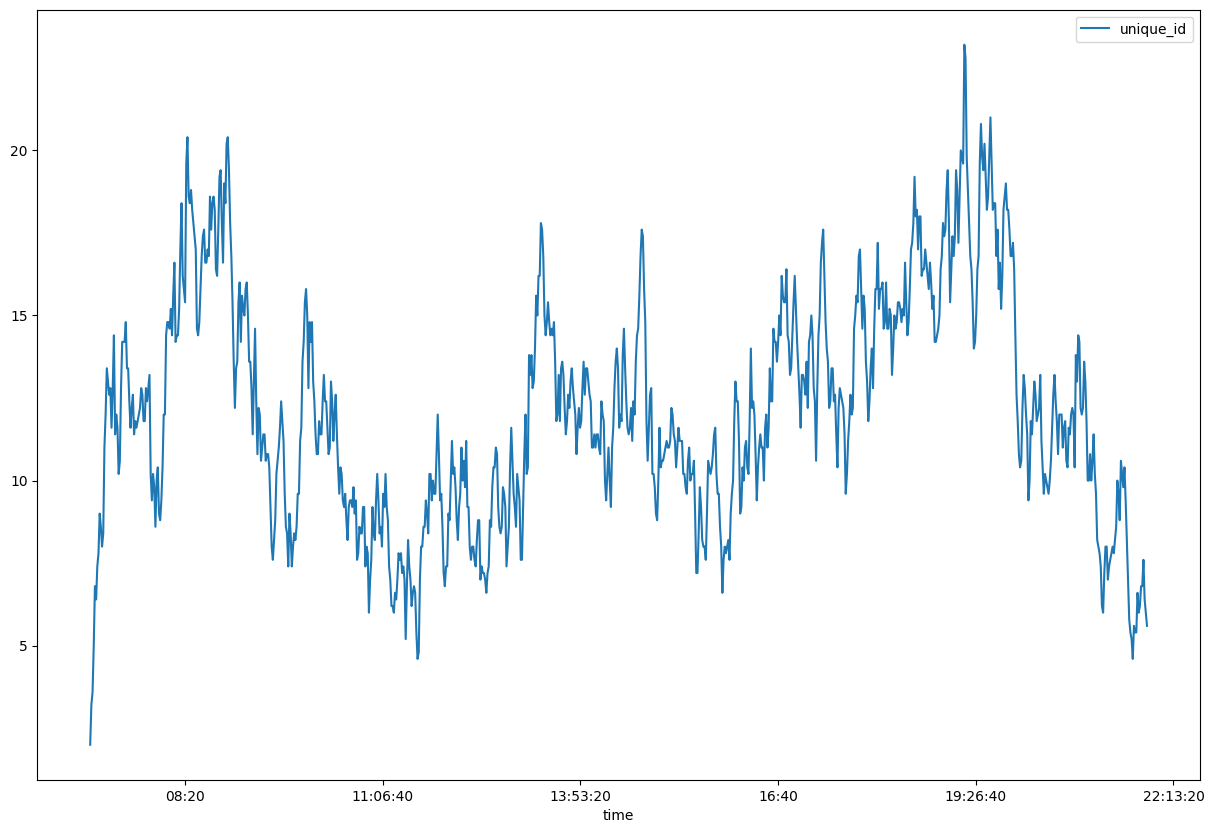

In [12]:
(supermarket_data.groupby(['time'])[['unique_id']].count()/5).plot(figsize=(15, 10))

## First section probability

In [13]:
first_section = supermarket_data[supermarket_data['location'] != 'checkout'].groupby('location')[['unique_id']].count()/len(supermarket_data[supermarket_data['location'] != 'checkout'])

In [14]:
first_section

,unique_id
location,
dairy,0.382499
drinks,0.209079
fruit,0.273370
spices,0.135051


In [15]:
supermarket_data.location.unique()

array(['fruit', 'drinks', 'dairy', 'spices', 'checkout'], dtype=object)

## Add the following section column to data

In [16]:
supermarket_data['following'] = supermarket_data.groupby('customer_no')[['location']].shift(-1)

In [17]:
supermarket_data.head(10)

,customer_no,location,unique_id,time,following
timestamp,,,,,
2019-09-03 07:02:00,1,fruit,1.1,07:02:00,fruit
2019-09-03 07:02:00,2,drinks,2.1,07:02:00,drinks
2019-09-03 07:03:00,1,fruit,1.1,07:03:00,fruit
2019-09-03 07:03:00,2,drinks,2.1,07:03:00,drinks
2019-09-03 07:03:00,3,dairy,3.1,07:03:00,dairy
2019-09-03 07:04:00,1,fruit,1.1,07:04:00,drinks
2019-09-03 07:04:00,2,drinks,2.1,07:04:00,drinks
2019-09-03 07:04:00,3,dairy,3.1,07:04:00,dairy
2019-09-03 07:05:00,1,drinks,1.1,07:05:00,drinks


In [18]:
supermarket_data.time.min(), supermarket_data.time.max()

(datetime.time(7, 0), datetime.time(21, 51))

## Transition matrix for sections

In [19]:
pd.crosstab(supermarket_data['location'], supermarket_data['following'], normalize=0)

following,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.287140,0.151777,0.374112,0.186971
dairy,0.103344,0.737061,0.058500,0.049789,0.051307
drinks,0.215688,0.010898,0.598540,0.087900,0.086974
fruit,0.201447,0.095848,0.054804,0.597264,0.050637
spices,0.150565,0.193061,0.162979,0.090880,0.402515


In [20]:
transition_matrix = pd.crosstab(supermarket_data['location'], supermarket_data['following'], normalize=0).values

In [21]:
transition_matrix

array([[0.        , 0.28714044, 0.15177665, 0.37411168, 0.18697124],
       [0.10334364, 0.73706097, 0.05849958, 0.04978927, 0.05130655],
       [0.21568829, 0.0108975 , 0.59854015, 0.08789966, 0.0869744 ],
       [0.20144677, 0.0958484 , 0.05480421, 0.59726372, 0.05063689],
       [0.15056502, 0.19306064, 0.16297947, 0.09088015, 0.40251472]])